# Time Series Analysis of the Air Passenger Dataset
International Airline Passengers (airpass). The data contains the number of total passengers every month, from January 1949 to December 1960. 

Dahai Liu

### Recap of analysis in homework 1

###### Train-Test split

In [1]:
### Import data and plot the ts

airdata = read.csv("airpass.csv",header = T,sep = ",")

### Train test split
airpass.ts      = ts(airdata$airpass, frequency = 12, start = c(1949,1), end = c(1959, 12)) # years 1949- 1959.
airpass.ts
airpass.ts.test = ts(tail(airdata$airpass, n = 12), frequency = 12, start = c(1960,1))
airpass.ts.test



     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

###### Take log and add a moving average line

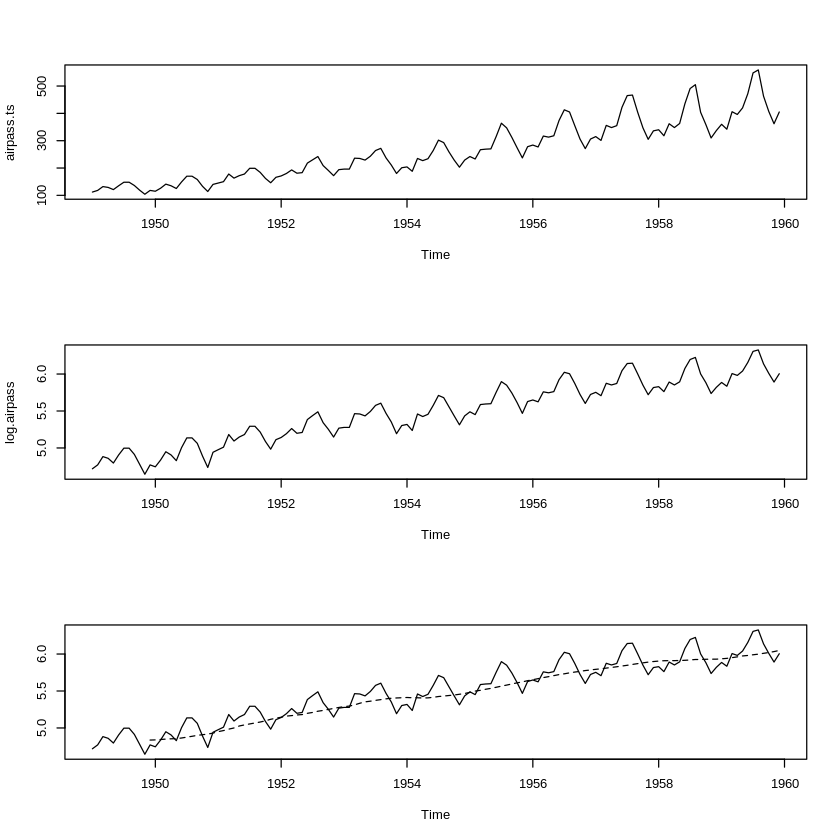

In [2]:
par(mfrow=c(3,1))
plot(airpass.ts)

### Log 
log.airpass <- log(airpass.ts)
plot(log.airpass, type = 'l')

## Generate a moving average line and add it in the plot
library('TTR')
airpass.ma <- SMA(log.airpass, n=12) 
ts.plot(log.airpass, airpass.ma, lty=c(1,2) )

###### Decomposition of trend, seasonality and then smooth out. Plot Residual

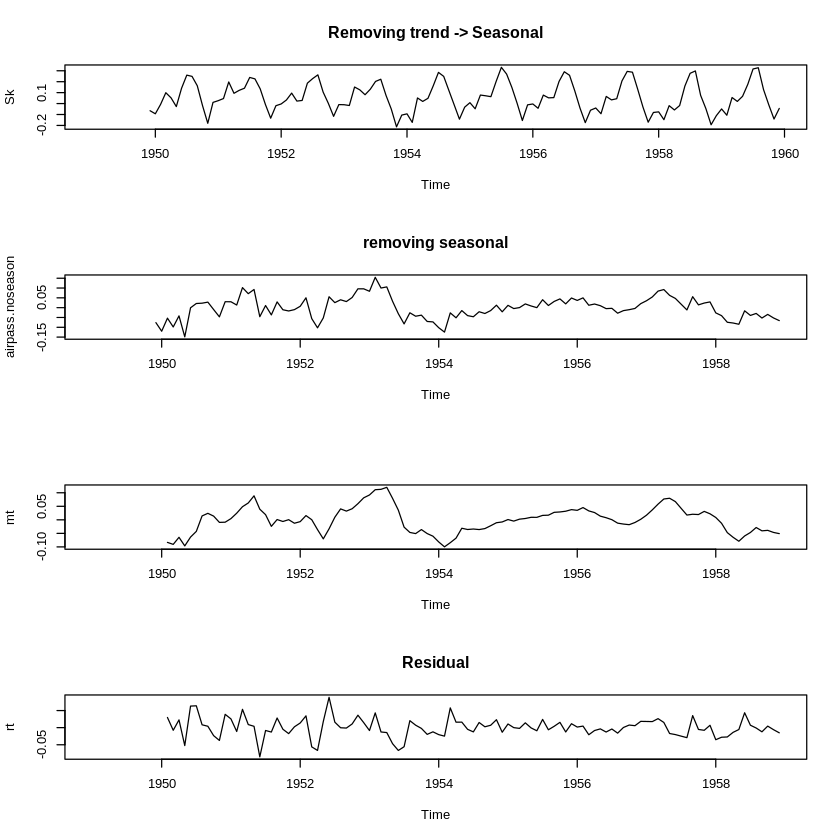

In [3]:
par(mfrow=c(4,1))
### Seasonal Compoment
Sk <- log.airpass - airpass.ma  ### remove the moving average (trend): To estimate the seasonal component
plot(Sk, main = 'Removing trend -> Seasonal')

airpass.noseason <- Sk - lag(Sk, k=12) ### Removing seasonal:
plot(airpass.noseason, main = 'removing seasonal')

### 3 period simple moving average to the deseasonalized data
mt <- SMA(airpass.noseason, n = 3, main = 'MA3 period smooth out') ### Smoothout
plot(mt)


### Plot the residule and now it looks like white noise
rt <- airpass.noseason - mt
plot(rt, main =  'Residual')


Time Series:
Start = c(1950, 2) 
End = c(1958, 12) 
Frequency = 11.9999999999998 
  [1]  2.976423e-02 -7.661676e-03  2.272795e-02 -5.238946e-02  6.302136e-02
  [6]  6.391857e-02  8.353638e-03  4.102703e-03 -2.337011e-02 -3.737550e-02
 [11]  3.894310e-02  2.556586e-02 -1.120419e-02  5.358309e-02  9.034450e-03
 [16]  3.942630e-03 -8.532374e-02 -8.298303e-03 -1.282879e-02  2.821019e-02
 [21] -4.609887e-03 -1.744478e-02  2.483894e-03  1.363444e-02  3.447956e-02
 [26] -5.624405e-02 -6.660034e-02  1.794252e-02  8.867369e-02  1.602214e-02
 [31] -3.319966e-04 -1.186819e-03  1.081090e-02  3.640797e-02  1.473806e-02
 [36] -8.403714e-03  4.320730e-02 -1.265844e-02 -1.435033e-02 -4.683216e-02
 [41] -6.665930e-02 -5.572475e-02  2.041984e-02  7.203935e-03 -2.207527e-03
 [46] -1.962625e-02 -1.222019e-02 -2.041766e-02 -2.478186e-02  5.780954e-02
 [51]  1.593184e-02  1.616873e-02 -4.879025e-03 -1.240328e-02  1.506569e-02
 [56]  2.553924e-03  6.963132e-03  2.325631e-02 -1.335796e-02  1.072452e-02
 [61] 

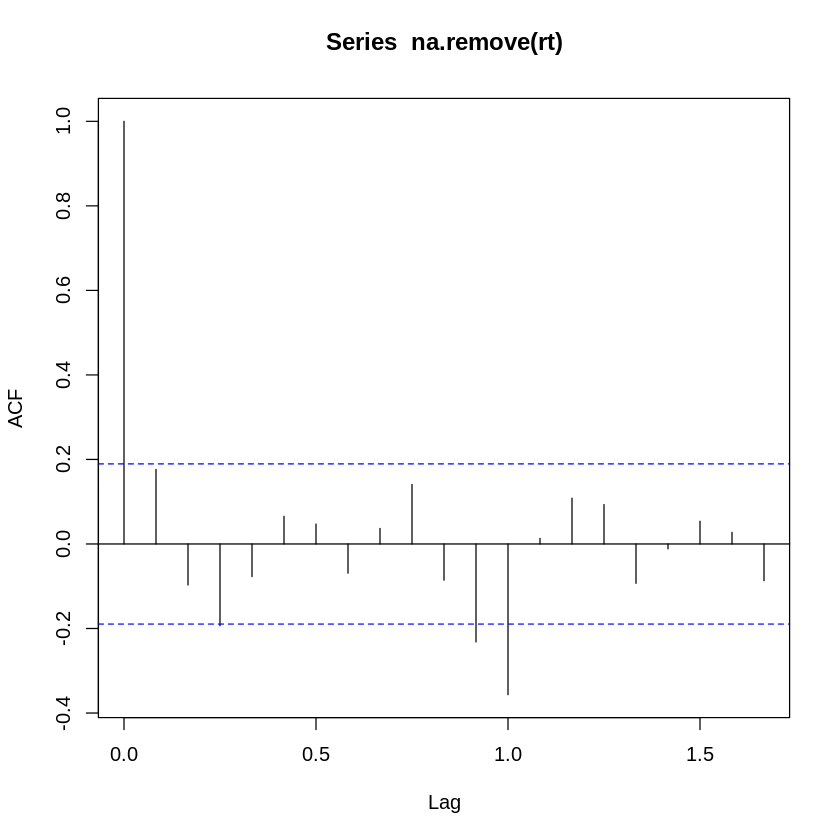

In [4]:
library('tseries')

na.remove(rt)

acf(na.remove(rt))

#### Now the residual has a good ACF which does not look correlated, which indicate a good model

### (a) Perform a time series analysis on the airline data set for the years 1949- 1959.

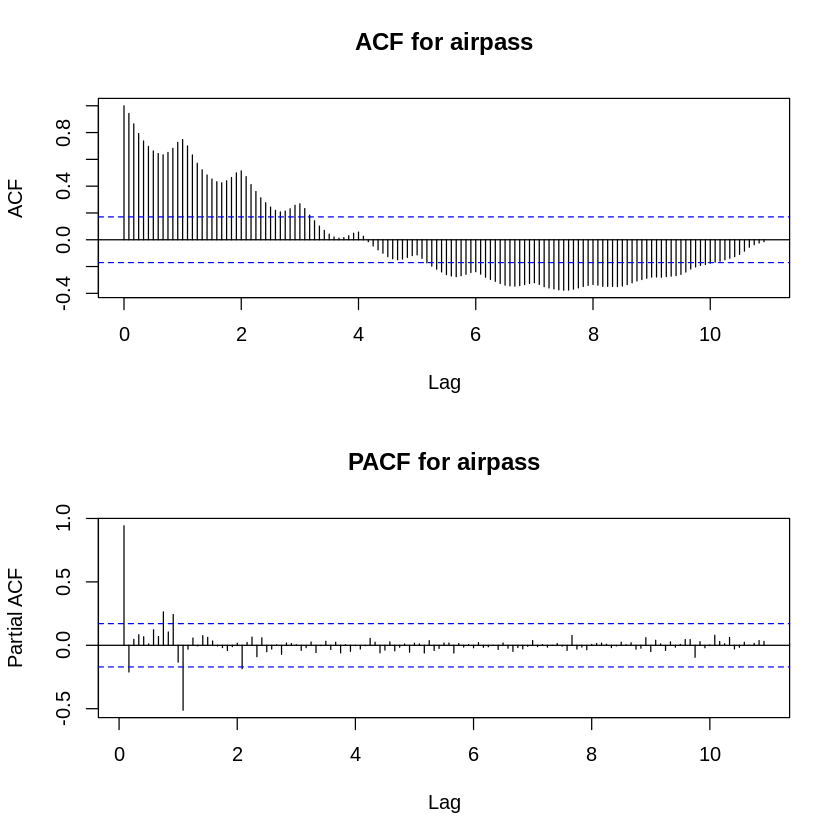

In [5]:
par(mfrow=c(2,1))
library(forecast)

acf(airpass.ts, lag.max = 1000, main = "ACF for airpass")
### This suggest a non stationary dataset so we need to de-seasonalize the data before deciding orders

pacf(airpass.ts, lag.max = 1000, main = "PACF for airpass")

### Question:
1) Is the first acf suggest a stationary series?  
Yes. Becuase the second lag did not die very slow. The PACF also backs it up. 







5) Key does not split train validation set. But achieved same prediction (Log version)

6) Log version, PACF is negatively significant at lag 1, but ACF is positive at lag 1, so does it suggest P=1 or 0?


In [6]:
#### This suggest (p=0/1,d=1,q=1, P=0,D=1,Q=0, m=12)
#### Negative acf(1) sig, MA1

### Take lag 1 first and then lag 12

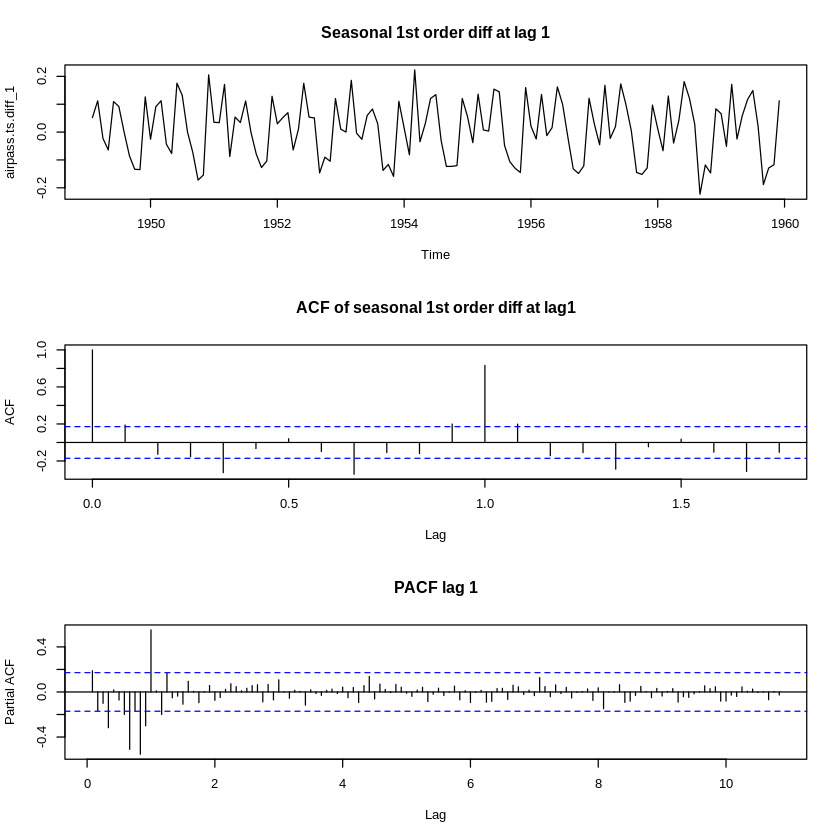

In [7]:
par(mfrow=c(3,1))
### Take the 1st order differencing of lag 12 for seasonality
airpass.ts.diff_1  <- diff(log.airpass, lag = 1)
plot(airpass.ts.diff_1, main = 'Seasonal 1st order diff at lag 1')
acf(airpass.ts.diff_1, main = 'ACF of seasonal 1st order diff at lag1')
acf(type = 'partial', airpass.ts.diff_1, lag.max = 600, main = 'PACF lag 1') ### 
### After taking the lag 1 difference, the PACF  is still very distinct in lag 12

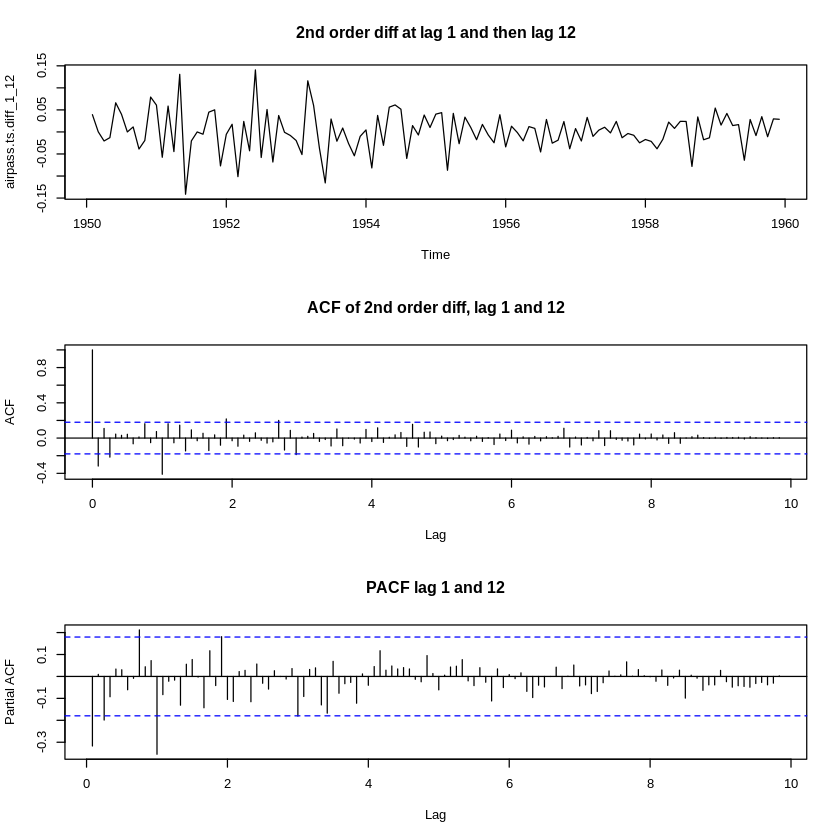

In [8]:
par(mfrow=c(3,1))
### Take second order differencing at lag 12
airpass.ts.diff_1_12  <- diff(airpass.ts.diff_1, lag = 12)
plot(airpass.ts.diff_1_12, main = '2nd order diff at lag 1 and then lag 12') 
### This is stationarilized now 
acf(airpass.ts.diff_1_12, lag.max = 600, main = 'ACF of 2nd order diff, lag 1 and 12') ### 
acf(type = 'partial', airpass.ts.diff_1_12, lag.max = 600, main = 'PACF lag 1 and 12') ### 

##### Comparing AutoArima with the model I fit according to the analysis of differencing and ACF/PACF

In [9]:
#### Above chart suggest (p=1/0,d=1,q=1, P=1,D=1,Q=0, m=12), or 1/0,1,1,1,1,0,12

In [10]:
library(astsa)

### Run Auto Arima
model_0 = auto.arima(log.airpass, d=1, approximation=FALSE)### Approximation what does it do
model_0


Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



Series: log.airpass 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.3484  -0.5623
s.e.   0.0943   0.0774

sigma^2 estimated as 0.001338:  log likelihood=223.63
AIC=-441.26   AICc=-441.05   BIC=-432.92

In [11]:
### Comparing Models
model1<-arima(log.airpass,order=c(0, 1, 1),
            seasonal=list(order=c(1, 1, 0), period=12))
#### This is the model I fit, 
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-model_0 ### This is the autoarima
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value))
colnames(df)<-c('Model1: by Dahai', 'Model2: By Auto Arima')
format(df, scientific=FALSE)

,Model1: by Dahai,Model2: By Auto Arima
AIC,-434.7821441,-441.2593823
SSE,0.1674092,0.1564962
p-value,0.6590978,0.4478628


In [12]:
summary(model1)


Call:
arima(x = log.airpass, order = c(0, 1, 1), seasonal = list(order = c(1, 1, 0), 
    period = 12))

Coefficients:
          ma1     sar1
      -0.3918  -0.4678
s.e.   0.0903   0.0825

sigma^2 estimated as 0.001404:  log likelihood = 220.39,  aic = -434.78

Training set error measures:
                      ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.001146867 0.03561252 0.02734856 0.02083762 0.4998494 0.3029259
                     ACF1
Training set 0.0004728276


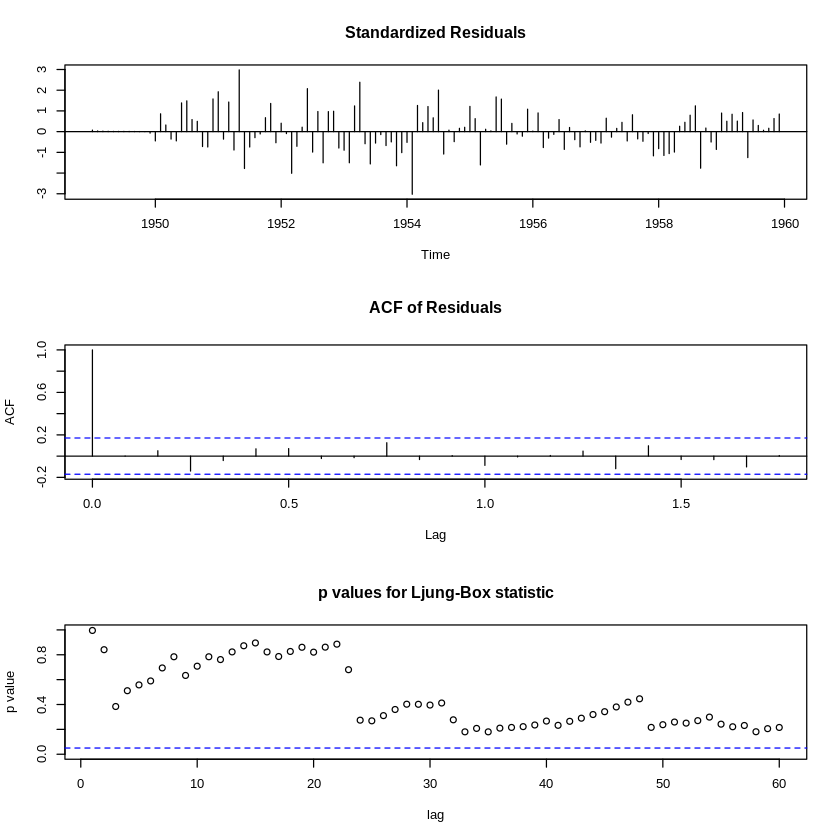

In [13]:
## Model Diagnostic
tsdiag(model1,gof=60)

initial  value 2.378764 
iter   2 value 2.348419
iter   3 value 2.348410
iter   4 value 2.348410
iter   4 value 2.348410
final  value 2.348410 
converged
initial  value 2.345358 
iter   2 value 2.345356
iter   2 value 2.345356
iter   2 value 2.345356
final  value 2.345356 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ar1
      -0.2431
s.e.   0.0894

sigma^2 estimated as 108.9:  log likelihood = -447.95,  aic = 899.9

$degrees_of_freedom
[1] 118

$ttable
    Estimate     SE t.value p.value
ar1  -0.2431 0.0894 -2.7183  0.0076

$AIC
[1] 5.705352

$AICc
[1] 5.721208

$BIC
[1] 4.727191


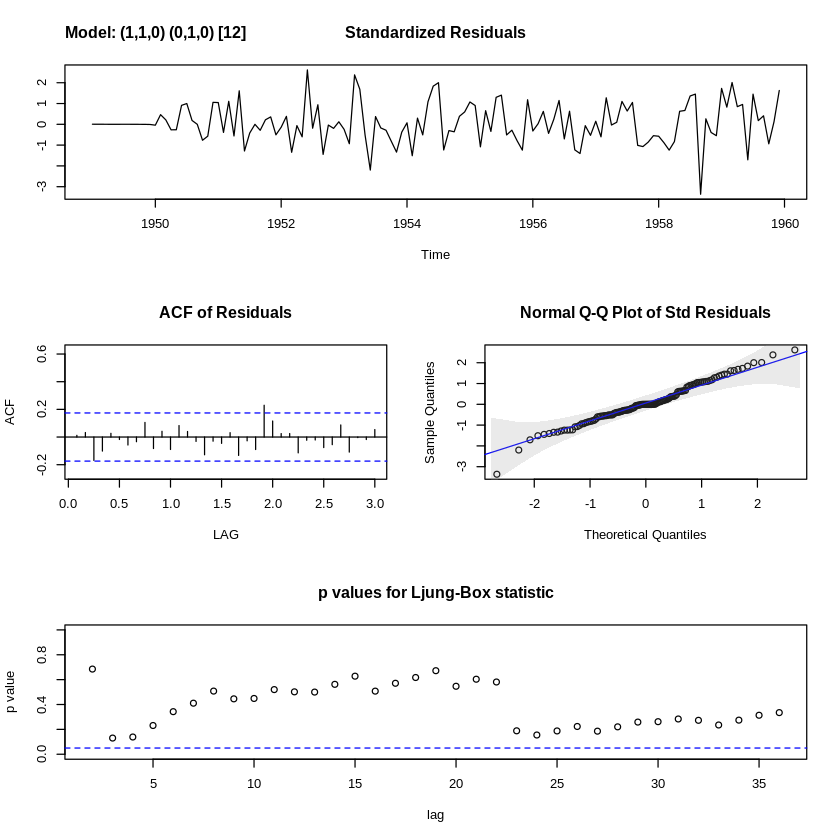

In [14]:
### To check different test, another way to call SARIMA rather than ARIMA
sarima(airpass.ts, 1,1,0,0,1,0, S = 12) 
### I don't know if this model is OK. Some P is sig?

### (b) Forecast the next 12 values for the year 1960 and compute the corre-sponding 95% forecasting intervals.  You should also plot out the graph of the forecasts.

In [15]:
### Predict
model_0_forecast <- forecast(model_0, h = 12, level = 95)
model_0_forecast
model_1_forecast <- forecast(model1, h = 12, level = 95)
model_1_forecast

         Point Forecast    Lo 95    Hi 95
Jan 1960       6.038647 5.966965 6.110329
Feb 1960       5.988763 5.903209 6.074317
Mar 1960       6.145428 6.047955 6.242900
Apr 1960       6.118993 6.010909 6.227077
May 1960       6.159652 6.041909 6.277395
Jun 1960       6.304666 6.177998 6.431334
Jul 1960       6.433288 6.298285 6.568292
Aug 1960       6.445958 6.303104 6.588812
Sep 1960       6.266719 6.116424 6.417014
Oct 1960       6.136192 5.978808 6.293576
Nov 1960       6.007899 5.843730 6.172067
Dec 1960       6.114338 5.943656 6.285020

         Point Forecast    Lo 95    Hi 95
Jan 1960       6.032106 5.958659 6.105554
Feb 1960       5.973515 5.887551 6.059479
Mar 1960       6.125435 6.028558 6.222312
Apr 1960       6.093712 5.987032 6.200391
May 1960       6.144768 6.029115 6.260422
Jun 1960       6.291533 6.167553 6.415513
Jul 1960       6.427639 6.295857 6.559420
Aug 1960       6.451367 6.312221 6.590514
Sep 1960       6.246703 6.100563 6.392844
Oct 1960       6.122851 5.970036 6.275666
Nov 1960       5.991845 5.832635 6.151054
Dec 1960       6.090647 5.925290 6.256005

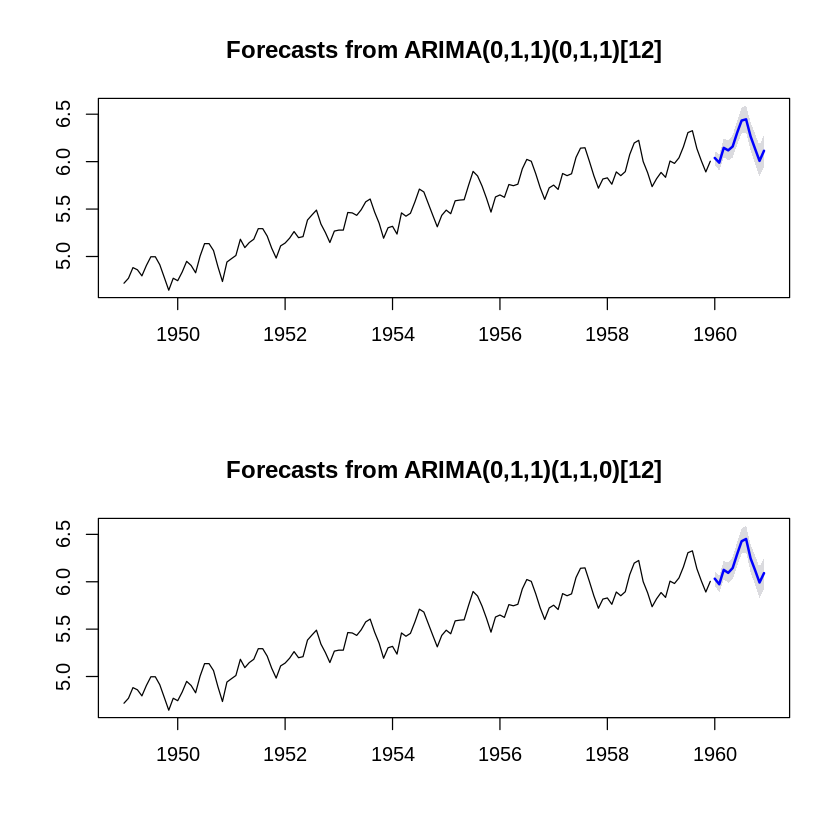

In [16]:
par(mfrow=c(2,1))
plot(model_0_forecast)
plot(model_1_forecast)

In [17]:
### Compare forecast with true labels
model_0_forecast
model_0_forecast$mean
airpass.ts.test

         Point Forecast    Lo 95    Hi 95
Jan 1960       6.038647 5.966965 6.110329
Feb 1960       5.988763 5.903209 6.074317
Mar 1960       6.145428 6.047955 6.242900
Apr 1960       6.118993 6.010909 6.227077
May 1960       6.159652 6.041909 6.277395
Jun 1960       6.304666 6.177998 6.431334
Jul 1960       6.433288 6.298285 6.568292
Aug 1960       6.445958 6.303104 6.588812
Sep 1960       6.266719 6.116424 6.417014
Oct 1960       6.136192 5.978808 6.293576
Nov 1960       6.007899 5.843730 6.172067
Dec 1960       6.114338 5.943656 6.285020

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1960 6.038647 5.988763 6.145428 6.118993 6.159652 6.304666 6.433288 6.445958
          Sep      Oct      Nov      Dec
1960 6.266719 6.136192 6.007899 6.114338

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

In [18]:
log.ts.test <- log(airpass.ts.test)

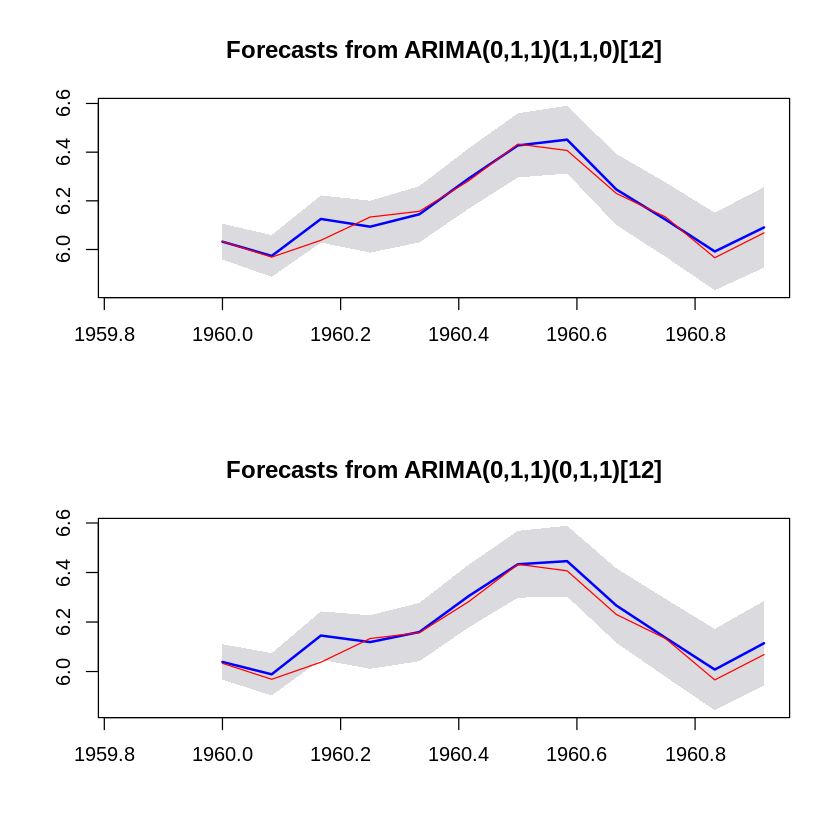

In [19]:
### Plot the comparison
par(mfrow=c(2,1))
plot(model_1_forecast, include = 0)
lines(log.ts.test, col = 'red')

plot(model_0_forecast, include = 0)

lines(log.ts.test, col = 'red')


          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1960 410.9614 385.0112 412.8546 454.8810 465.8403 528.6953 615.5667 599.5540
          Sep      Oct      Nov      Dec
1960 501.7333 454.8638 383.9921 425.8857

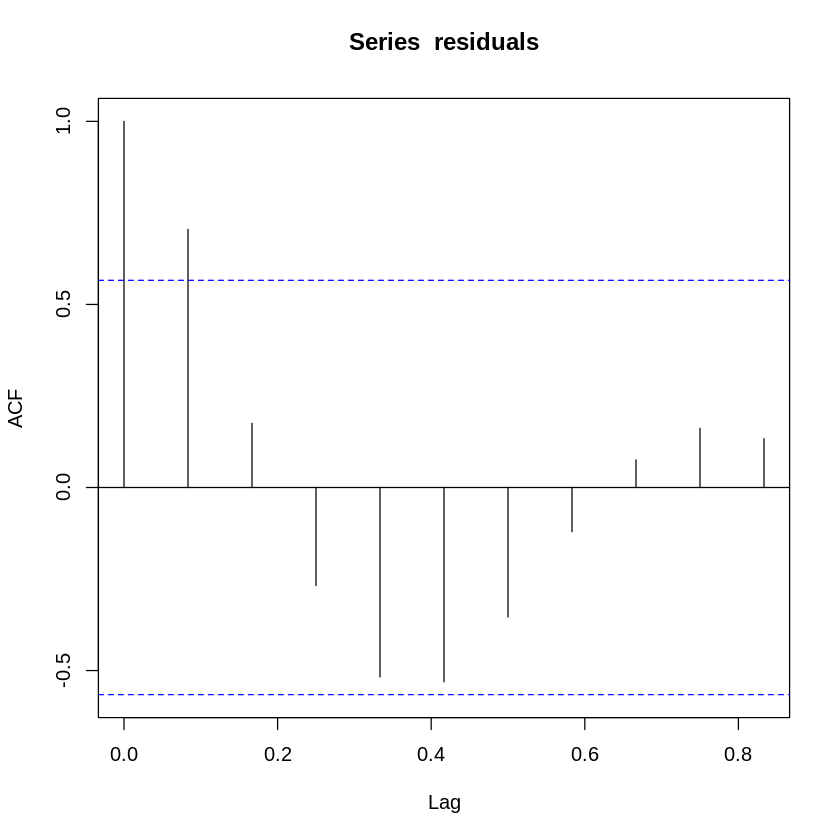

In [20]:
#rt <- airpass.noseason - mt
residuals  <- airpass.ts.test - model_0_forecast$mean
residuals
acf(residuals)
mse <- mean((model_0_forecast$mean - airpass.ts.test)^2)


In [21]:
mse <- mean((model_0_forecast$mean - airpass.ts.test)^2)
mse

[1] 226405.7

# Project 2.  Perform a time series analysis on the weekly exchange rate between theU.S. dollar and the pound sterling for the year 1980 - 1988.  Answer thefollowing:

### (a) Is the exchange rate stationary?

In [22]:
exchange_data = read.csv("exchange.csv",header = F,sep = ",")

In [23]:
exchange.ts = ts(exchange_data, frequency = 12, start = c(1980,1), end = c(1988, 12)) 

In [24]:
exchange.ts

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1980 2.24 2.26 2.29 2.26 2.27 2.30 2.30 2.28 2.27 2.23 2.21 2.18
1981 2.17 2.14 2.20 2.22 2.18 2.26 2.27 2.28 2.33 2.35 2.33 2.34
1982 2.34 2.35 2.36 2.38 2.37 2.39 2.33 2.37 2.38 2.37 2.40 2.41
1983 2.41 2.39 2.39 2.39 2.40 2.42 2.44 2.44 2.42 2.40 2.36 2.36
1984 2.34 2.32 2.34 2.34 2.38 2.40 2.39 2.41 2.37 2.34 2.28 2.31
1985 2.20 2.19 2.22 2.27 2.23 2.21 2.18 2.15 2.17 2.14 2.12 2.07
1986 2.07 2.07 1.93 1.96 1.97 1.95 1.89 1.89 1.86 1.84 1.84 1.79
1987 1.81 1.88 1.85 1.84 1.78 1.84 1.79 1.82 1.91 1.83 1.82 1.84
1988 1.88 1.91 1.90 1.96 1.94 1.89 1.88 1.89 1.91 1.92 1.87 1.87

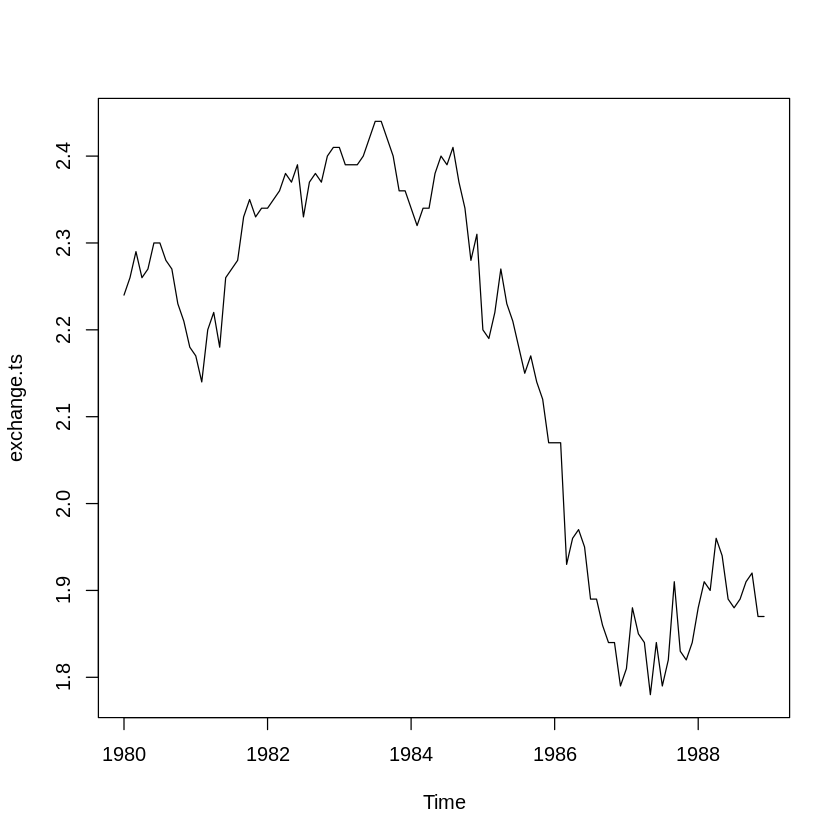

In [25]:
plot(exchange.ts)

### Question:
1) should use box or should use dickey fuller? 

### (b) Are there difference regimes?  Provide statistical tests.

In [26]:
Box.test(exchange.ts, lag = log(length(exchange.ts)))


	Box-Pierce test

data:  exchange.ts
X-squared = 386.93, df = 4.6821, p-value < 2.2e-16


In [27]:
exchange_diff  <- diff(exchange.ts, lag = 1)
exchange_diff

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1980        0.02  0.03 -0.03  0.01  0.03  0.00 -0.02 -0.01 -0.04 -0.02 -0.03
1981 -0.01 -0.03  0.06  0.02 -0.04  0.08  0.01  0.01  0.05  0.02 -0.02  0.01
1982  0.00  0.01  0.01  0.02 -0.01  0.02 -0.06  0.04  0.01 -0.01  0.03  0.01
1983  0.00 -0.02  0.00  0.00  0.01  0.02  0.02  0.00 -0.02 -0.02 -0.04  0.00
1984 -0.02 -0.02  0.02  0.00  0.04  0.02 -0.01  0.02 -0.04 -0.03 -0.06  0.03
1985 -0.11 -0.01  0.03  0.05 -0.04 -0.02 -0.03 -0.03  0.02 -0.03 -0.02 -0.05
1986  0.00  0.00 -0.14  0.03  0.01 -0.02 -0.06  0.00 -0.03 -0.02  0.00 -0.05
1987  0.02  0.07 -0.03 -0.01 -0.06  0.06 -0.05  0.03  0.09 -0.08 -0.01  0.02
1988  0.04  0.03 -0.01  0.06 -0.02 -0.05 -0.01  0.01  0.02  0.01 -0.05  0.00

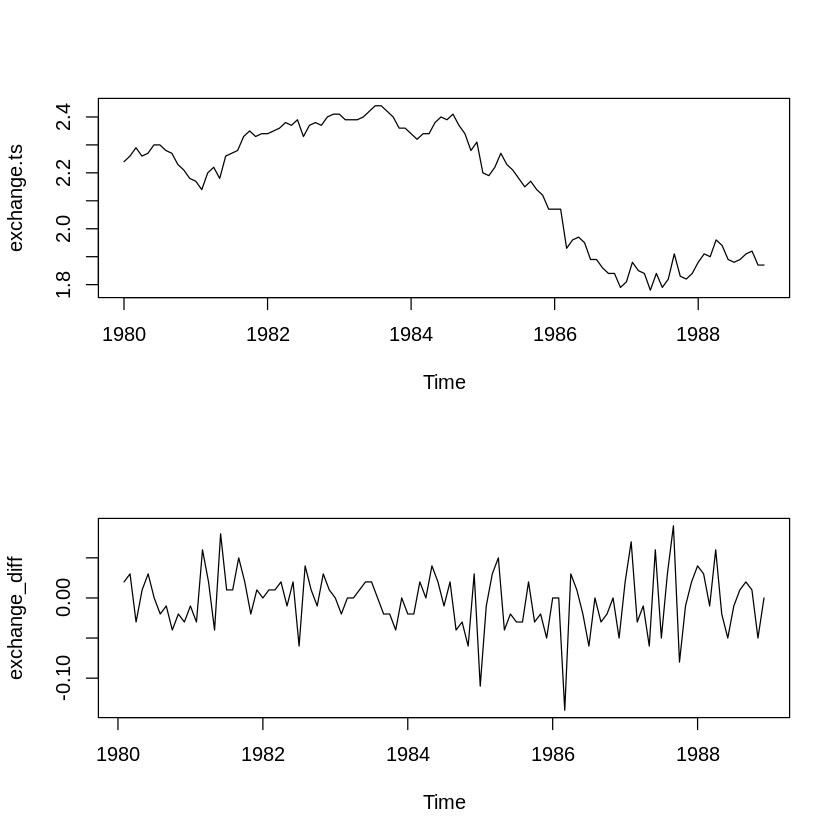

In [28]:
par(mfrow=c(2,1))
plot(exchange.ts)
plot(exchange_diff)

In [29]:
Box.test(exchange_diff)  ### now is stationary


	Box-Pierce test

data:  exchange_diff
X-squared = 1.5515, df = 1, p-value = 0.2129
